|--- | Revenir à la [page déroulement](../README.ipynb) | [SYS2 - bac à sable](SYS2_bac_a_sable.ipynb)|
|-------------|---|---|

---
# SYS1 - Signaux de base
---


Nous allons voir les signaux et systèmes de base utilisés pour décomposer un signal/système plus complexe.

On comprend alors la chaîne d'intégration avec à la base la **distribution de Dirac** :

$ \delta_0 \quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad 
u \quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
r : t\mapsto t.u(t)\quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
a : t\mapsto \frac{1}{2}.t^2.u(t)\quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
\ldots$ 

Ce qui donnera en transformées de Laplace

$ \delta_0(p) = 1 \quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad 
U(p)=\frac{1}{p} \quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
R(p)=\frac{1}{p^2} \quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
A(p)=\frac{1}{p^3}\quad\underset{\underset{p}{\longleftarrow}}{\overset{p^{-1}}{\longrightarrow}}\quad
\ldots$ 

# Notations et rigueur réel $\neq$ fonction $\neq$ opérateur
Pour comprendre $f(t) \neq f$, $T[f]=g$ correct, $T[f(\bullet-2)](t)$ correct et $T[f(t-2)]$ incorect

## Réel $\neq$ Fonction ou Signal $\neq$ valeur du signal à un instant

> Attention $f\neq f(t)$ car f est une fonction $\mathbb{R}\to\mathbb{R}$ et $f(t)\in \mathbb{R}$ est un réel qui est sa valeur en supposant que $t$ est défini quelque part dans le texte (genre $\forall t\in\mathbb{R}$ ou bien *Soit $t\in\mathbb{R}$*)!
 
Lorsque l'on veut parler par exemple de la fonction $t \mapsto f(t-2)$ (et non $f(t-2)$ qui est un réel) on utilisera la notation concise $f(\bullet-2)$  qui montre clairement que c'est une fonction et que la variable peut être autre chose que $t$.

> $\forall t\in\mathbb{R}, f(\bullet-2)(t) = f(t-2)$ mais $f(t-2)$ est un nombre et non une fonction !

## Fonction $\neq$ Opérateur ou Signal $\neq$ Système

Un système est représenté par un **opérateur** mathématique, c-à-d une **application qui transforme une application en application !**

En effet un système transforme un signal d'entrée en un signal de sortie (et non pas des réels !). Il est important de différentier :
  - $f$ : une fonction qui transforme un réel en un réel
  - $T\{f\}$ ou $T[f]$ : la fonction obtenue en appliquant un opérateur $T$ à une fonction $f$ 
  - $T\{f\}(t)$ : l'évaluation à l'instant $t$ de la fonction $T\{f\}$ obtenue en appliquant l'opérateur $T$ à la fonction $f$

>   En bref les () pour les fonctions et les {} ou [] pour les opérateurs transformants des fonctions en fonctions.  
>  $f(t) \neq f$, $T[f] = g \neq g(t)$, et  
>  $T[f](t) = g(t) \in \mathbb{R}$ mais $T[f(t)]$ n'as pas de sens !   
>  $T[f(t-2)]$ n'as pas de sens alors que $T[t\mapsto f(t-2)]=T[f(\bullet-2)]$ oui !  

# L'opérateur intégrale : echelon u, rampe r et ...
Comprendre l'intégrale de l'échelon $u$, de la rampe $r$, pour avoir l'accélération $a$ et comment afficher avec Matlab/Octave

## Echelon unité - Unit step - u 

Le premier signal de base est l'échelon unité ou échelon de Heaviside noté $u$ (parfois $h$ en hommage à Heaviside)qui est de $\mathbb{R}\to\mathbb{R}$.

Il vaut 1 lorsque la variable est strictement positive, 0 lorsqu'elle est strictement négative. Il n'y a pas de convention unanime pour donner une valeur en 0 où la fonction est discontinue.

Utilisons Matlab/Octave pour l'afficher (faire SHIFT+ENTER dans la cellule pour l'exécuter) :

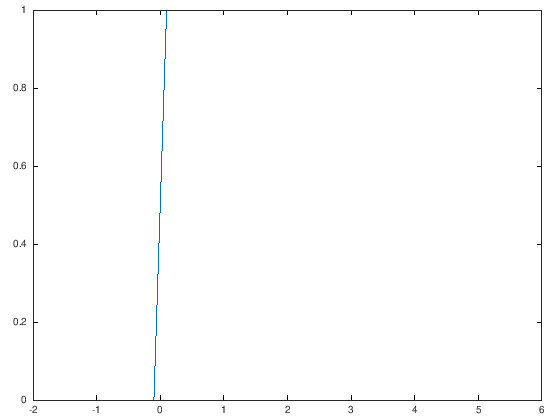

In [1]:
clear all;

signaux_de_base ; %importe le vecteur temps t, 
                  %  les fonctions u,r,a et 
                  % les opérateurs OpD (dérivée) et OpI(intégrale)
plot(t,u(t))


## Rampe unitée - Unit ramp - r

L'intégrale de l'échelon qui s'annule pour t<0 de ce signal est la "fonction rampe" (*ramp* en anglais) notée $r$.

On peut la définir comme la fonction $t\mapsto t.u(t)$ où l'échelon de Heaviside sert comme souvent à annuler la fonction pour les temps négatifs (on parle alors de *fonction causale*)

In [2]:
plot(t,r(t),'o-',t,u(t),'+-')
legend(['echelon u';'rampe r'])

    legend at line 378 column 9
error: kids(0): subscripts must be either integers 1 to (2^31)-1 or logicals
error: called from
    legend at line 408 column 13


On peut utiliser le calcul numérique pour approcher la valeur d'une intégrale.

Ici on utilise l'**opérateur d'intégration** numérique `OpI` qui **prend une fonction et renvoie la fonction** primitive qui s'annule en 0.

Cet un opérateur donc il s'applique à la fonction $u$ et non pas à ses valeurs $u(t)$ ! 

On peut ensuite évaluer cette fonction $OpI(u)$ (fonction primitive) à différents instants $t$ ce qui donne $OpI(u)(t)$ (valeurs de cette primitive)

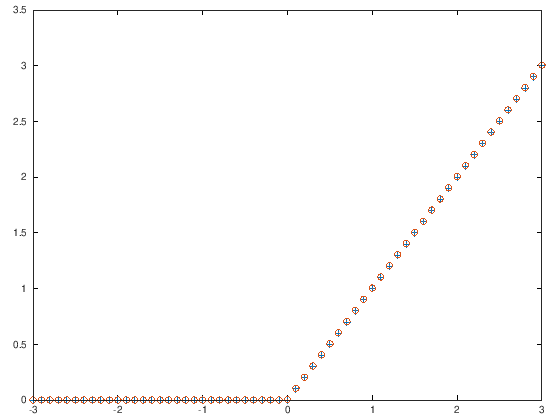

In [11]:
plot(t,r(t),'+', t,OpI(u)(t),'o')

## Accélération unité - Jerk - a

On peut ainsi rajouter la rampe d'accélération (*jerk function* parfois en anglais) qui est issue de l'intégrale d'une rampe.

On peut la définir comme l'intégrale de r qui s'annule en 0 : $t\mapsto \frac{1}{2}.t^2.u(t)$.

Elle est utilisée en robotique et physique et automatique car liée à des trajectoires à accélération constante. Cette fonction n'as pas de nom usuel dans la littérature, on prendra ici $a$ pour "accélération". 

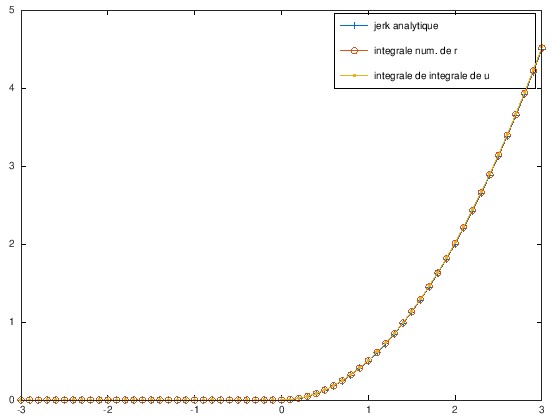

In [12]:
plot(t,a(t),'+-',t,OpI(r)(t),'o-',t,OpI(OpI(u))(t),'.-')
legend(['jerk analytique';'integrale num. de r';'integrale de integrale de u '])

# L'opérateur retard
$f(t-2)$ est en retard ou en avance ? Comprendre $t\mapsto f(t-2) = T_2[f]$ et afficher en Octave

On note $T_\tau$ le système qui **retarde* d'un temps $\tau$ un signal donc :

$T_\tau : f(\bullet) \quad\mapsto\quad f(\bullet-\tau)$

On note de manière brève $f(\bullet-\tau)$ la fonction $ t \mapsto f(t-\tau)$

Cela donne avec Octave/MAtlab

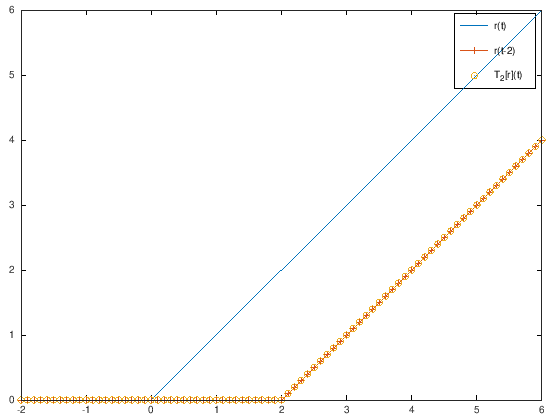

In [24]:
plot(t,r(t),t,r(t-2),'+-',t,OpT(r,2)(t),'o')
legend(["r(t)";"r(t-2)";"T_2[r](t)"])

# Discontinuités et Dirac

Avec l'opérateur dérivé $p$ on veut l'intégrale $p^{-1}$ telle que $p^{-1}\!\!\!\circ\!p=p\!\circ\!p^{-1} = Id$ 

Mais $p[u]=\vec{0}$ et $p^{-1}[p[u ]]=p^{-1}[\vec{0}]=\vec{0}$ car $u$ discontinue. 

Alors **fonctions généréalisées ou distribution** imaginaire $\delta_0 = p[u]$ et $p^{-1}[\delta_0]=u$

## L'opérateur dérivée p et intégrale $p^{-1}$
Comprendre l'opérateur d'intégration $p^{-1}[u]=r$, dérivation $p[r]=u$, et la notation $p^{-1}.p = \frac{1}{p}.p = 1\iff p^{-1}[p[f]] = p^{-1}\!\!\circ \!p[f] = f $ 

On définit l'opérateur dérivée par $p$ et on admet pour le moment que cet opérateur à un inverse qui est l'intégrale qui s'annule en 0.
Dans le cas de fonctions causales $f$ (nulle pour t<0), la primitive qui s'annule en zéro $F$ est aussi causale et on admet que sa dérivée de la primitive est bien $f$ : 

$\int f' \quad = t \mapsto \int\limits_0^t f'(\nu) d\nu \quad = t \mapsto f(t) - f(0^+)  \quad = f$

et

$F' \quad = t\mapsto \left(\int\limits_0^t f(\nu) d\nu \right)'  \quad = \left( F(t) - F(0) \right)' \quad =  f $ 

Ce qui en terme d'opérateur s'exprime par 

$p[F] = p[p^{-1}[f]] = p \circ p^{-1} [f] = Id[f] = f$

Par exemple appliquons cela à la fonction rampe. Dans `utiles` l'opérateur dérivée est défini comme `OpD` et l'opérateur primitive `OpI`

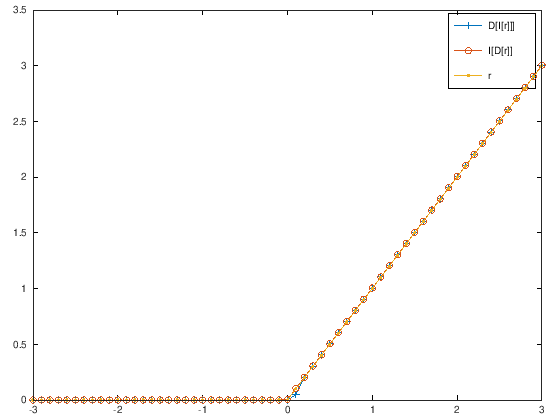

In [13]:
plot(t,OpD(OpI(r))(t),'+-',
     t,OpI(OpD(r))(t),'o-',
     t,r(t),'.-'
     )
legend(["D[I[r]]]";"I[D[r]]";"r"])

Remarquons que la primitive est bien l'opérateur inverse de la dérivée si la fonction $f$ est telle que $f(0)=0$ et $f(0^+)=0$ : autrement dit la fonction doit être nulle et continue à droite pour $t=0$.

Ce n'est pas le cas de la fonction échelon $u$ qui a une discontinuité à droite si on considère $u(0)=0$ (car $u(0^+)=1$) ou bien $u(0)=1$ si on prolonge par continuité à droite : 

> $p\circ p^{-1} = Id$ cela ne marche pas pour les discontinuités ! 

## Regardons la dérivée de l'échelon :

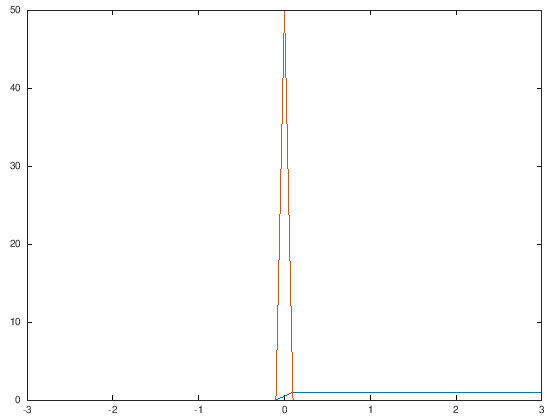

In [14]:
plot(t,u(t), t,OpD(u)(t))

La dérivée de l'échelon est donc nulle partout et infinie en $0$ !

En effet, l'échelon est représenté de manière numérique de manière imparfaite.
Zoomons dans le temps pour voir ce qui se passe en 0.

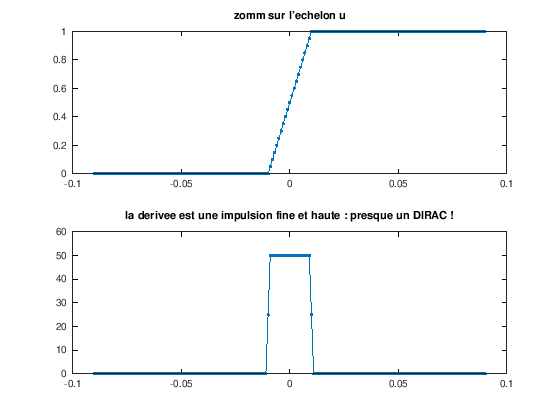

In [15]:
tzoom = -9*dt:dt/10:9*dt; 
subplot(211); plot(tzoom, u(tzoom),'.-') ; 
title("zomm sur l'echelon u")
subplot(212); plot(tzoom,OpD_Dt(u)(tzoom),'.-') ;
title("la derivee est une impulsion fine et haute : presque un DIRAC !")